#  Application of Artificial Neural Network to State-Of-Charge Estimation of Calendar-aged Lithium-ion Pouch Cells
Artificial Neural Network (ANN) has been used to estimate state-of-charge (SOC) of calendar-aged lithium-ion pouch cells. Calendar life data was generated by applying galvanostatic charge/discharge cycle loads at different storage temperature (35°C and 60°C) and conditions (fully-discharged and fully-charged). The data was obtained at various C-rates for duration of 10 months at one-month intervals. The ANN has achieved a R2 score of 99.91% and a mean absolute error (MAE) of 0.64% over test data, confirming the ability of ANN to capture input-output dependency. The model could be employed to estimate the SOC of calendar-aged lithium-ion batteries which is essential for the reliable operation of electic vehicles (EVs).  

## Library Imports

In [8]:
# Numpy and Pandas 
import numpy as np
import pandas as pd

# Vizualization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

# Machine learning algorithms
from sklearn.neural_network import MLPRegressor

# Machine learning pipeline 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Regression Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Ignore ConvergenceWarning messages
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

# Check the fitted_model
from sklearn.exceptions import NotFittedError

# Save python obect to disk
import pickle

## Exploratory Analysis

In [6]:
df = pd.read_csv('battery_data.csv')
df.head()

,SOC,Current,Voltage,month,Temp,Charged
0,1.000000,3.059,4.133,0,0,0
1,0.999873,3.043,4.132,0,0,0
2,0.999682,3.046,4.131,0,0,0
3,0.999428,3.041,4.130,0,0,0
4,0.999174,3.044,4.129,0,0,0


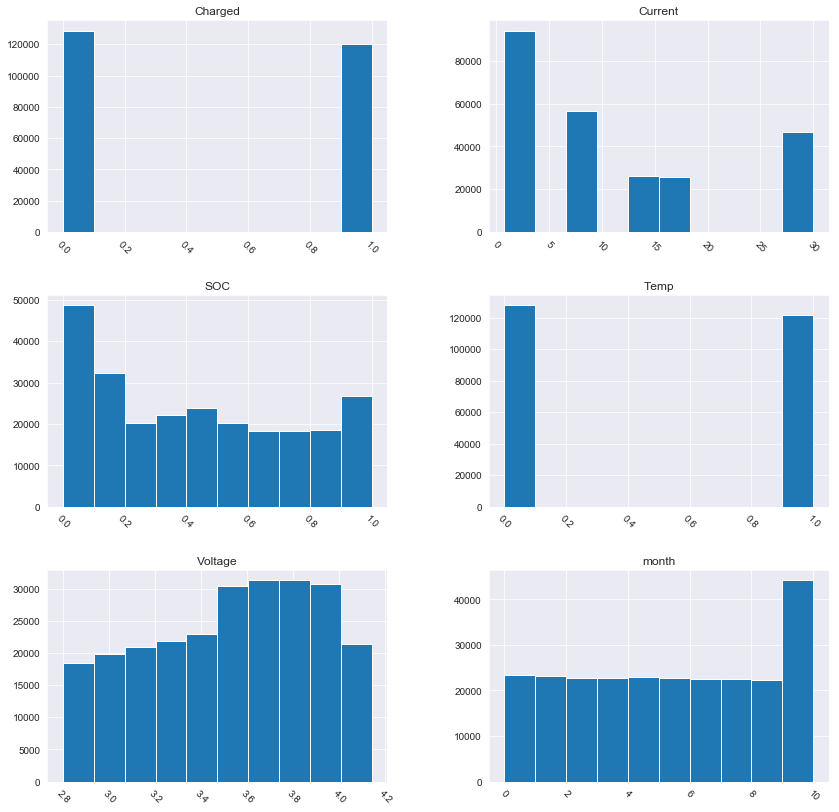

In [9]:
df.hist(figsize=(14,14), xrot=-45)
plt.show()

In [10]:
df.describe()

,SOC,Current,Voltage,month,Temp,Charged
count,249205.000000,249205.000000,249205.000000,249205.000000,249205.000000,249205.000000
mean,0.437959,11.708580,3.519027,4.947617,0.487346,0.483273
std,0.311927,9.886172,0.365043,3.161864,0.499841,0.499721
min,0.000000,0.754406,2.798700,0.000000,0.000000,0.000000
25%,0.135478,3.086750,3.220300,2.000000,0.000000,0.000000
50%,0.405770,7.714810,3.558300,5.000000,0.000000,0.000000
75%,0.707164,15.435000,3.827700,8.000000,1.000000,1.000000
max,1.000000,30.000000,4.140000,10.000000,1.000000,1.000000


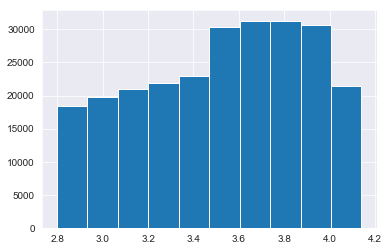

In [11]:
df.Voltage.hist()
plt.show()

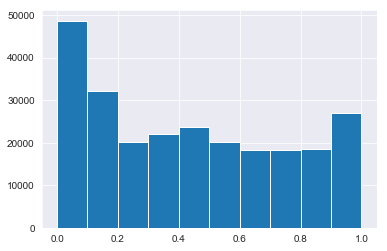

In [12]:
df.SOC.hist()
plt.show()

In [13]:
df.shape

(249205, 6)

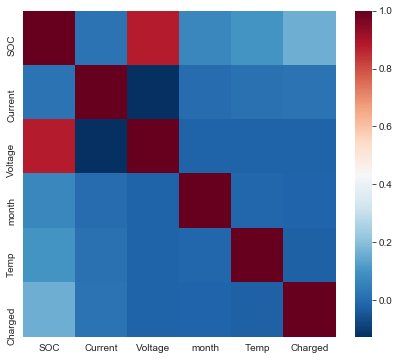

In [14]:
correlations = df.corr()
plt.figure(figsize=(7,6))
sns.heatmap(correlations, cmap='RdBu_r')
plt.show()

## Data Cleaning

In [15]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(249205, 6)
(249205, 6)


## Feature Engineering

In [16]:
Vavg_num = 100
V = []
V[:Vavg_num] = df.Voltage[:Vavg_num]
for i in range(Vavg_num,len(df.Voltage)):
    V.append(np.mean(df.Voltage[i-Vavg_num:i]))
df['Vmean'] = V
df.tail()

,SOC,Current,Voltage,month,Temp,Charged,Vmean
249200,0.523254,30.0000,2.8074,10,1,1,2.888221
249201,0.523149,29.9977,2.8054,10,1,1,2.886684
249202,0.523037,30.0000,2.8037,10,1,1,2.885141
249203,0.522942,29.9973,2.8021,10,1,1,2.883595
249204,0.522847,29.9995,2.8003,10,1,1,2.882046


## Algorithm Selection

In [17]:
df['month'] = df['month'].astype(float)
df['Temp'] = df['Temp'].astype(float)
df['Charged'] = df['Charged'].astype(float)
y = df.SOC
X = df.drop('SOC', axis=1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1234)
pipelines = {
    'mlp'   : make_pipeline(StandardScaler(), MLPRegressor(random_state=123))
}

In [21]:
# MLP hyperparameters
mlp_hyperparameters = {
    'mlpregressor__hidden_layer_sizes': [(5,), (10,), (100,)],
    'mlpregressor__activation': ['logistic', 'relu', 'tanh']
}

# Create hyperparameters dictionary
hyperparameters = {
    'mlp': mlp_hyperparameters
}

In [22]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

mlp has been fitted.


In [23]:
for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print (name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

mlp has been fitted.


## ANN performance

In [25]:
for name,model in fitted_models.items():
    pred = fitted_models[name].predict(X_test)
    print(name)
    print('R2:', r2_score(y_test, pred))
    print('MAE:', mean_absolute_error(y_test, pred))

mlp
R2: 0.9991135320228985
MAE: 0.0064350232457119376


## Insight & Analysis

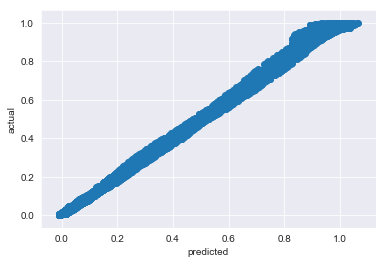

In [26]:
mlp_pred = fitted_models['mlp'].predict(X_test)
plt.scatter(mlp_pred, y_test)
plt.xlabel('predicted')                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
plt.ylabel('actual')
plt.show()

In [27]:
fitted_models['mlp'].best_estimator_

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlpregressor', MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
   ...=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))])

In [29]:
with open('MLP_SOC_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['mlp'].best_estimator_, f)